# Least squares

A mathematical procedure for finding the best-fitting curve to a given set of points by minimizing the sum of the squares of the offsets ("the residuals") of the points from the curve. The sum of the squares of the offsets is used instead of the offset absolute values because this allows the residuals to be treated as a continuous differentiable quantity. However, because squares of the offsets are used, outlying points can have a disproportionate effect on the fit, a property which may or may not be desirable depending on the problem at hand. 


### Show the data


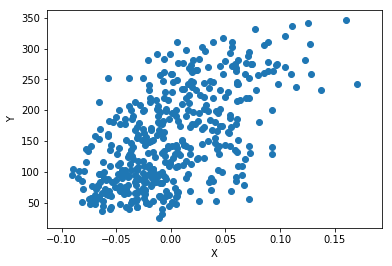

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets

# load data
d = datasets.load_diabetes()

X = d.data[:, 2]
Y = d.target

# draw original data
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### Theory
For $N$ observation data:
$$
\mathbf{X} = \{x_1, x_2, ..., x_N \} \\
\mathbf{Y} = \{y_1, y_2, ..., y_N \}
$$

We want to find the model which can predict the data. The simplest model is linear model, which has the form of 
$$
y = ax + b
$$

The purpose is to find parameters $a, b$ which best fit the model to the observation data. 

We use the sum of squares to measure the differences (loss function) between the model's prediction and observation data:
$$
L = \sum_{i=1}^{N} (y_i - a x_i - b)^2
$$

To make the loss function minimize, we can find the parameters:
$$
\frac{\partial L}{\partial a} = -2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i \\
\frac{\partial L}{\partial b} = -2 \sum_{i=1}^{N} (y_i - a x_i - b)
$$
When the loss is minimized, therefore the partial difference is zero, then we can get:
$$
-2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i = 0 \\
-2 \sum_{i=1}^{N} (y_i - a x_i - b) = 0 \\
$$

We reoder the items as:
$$
a \sum x_i^2 + b \sum x_i = \sum y_i x_i \\
a \sum x_i + b N = \sum y_i
$$
By solving the linear equation we can obtain the model parameters.

### Program

a = 949.435260, b = 152.133484


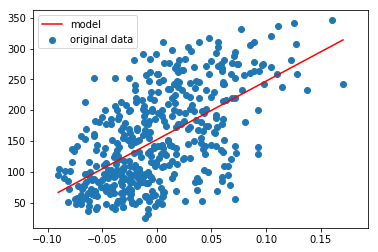

In [2]:
N = X.shape[0]

S_X2 = np.sum(X*X)
S_X  = np.sum(X)
S_XY = np.sum(X*Y)
S_Y  = np.sum(Y)

A1 = np.array([[S_X2, S_X], 
               [S_X, N]])
B1 = np.array([S_XY, S_Y])

coeff = np.linalg.inv(A1).dot(B1)

print('a = %f, b = %f' % (coeff[0], coeff[1]))

x_min = np.min(X)
x_max = np.max(X)
y_min = coeff[0] * x_min + coeff[1]
y_max = coeff[0] * x_max + coeff[1]

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## 如何使用迭代的方法求出模型参数

当数据比较多的时候，或者模型比较复杂，无法直接使用解析的方式求出模型参数。因此更为常用的方式是，通过迭代的方式逐步逼近模型的参数。

### 梯度下降法
在机器学习算法中，对于很多监督学习模型，需要对原始的模型构建损失函数，接下来便是通过优化算法对损失函数进行优化，以便寻找到最优的参数。在求解机器学习参数的优化算法中，使用较多的是基于梯度下降的优化算法(Gradient Descent, GD)。

梯度下降法有很多优点，其中，在梯度下降法的求解过程中，只需求解损失函数的一阶导数，计算的代价比较小，这使得梯度下降法能在很多大规模数据集上得到应用。梯度下降法的含义是通过当前点的梯度方向寻找到新的迭代点。

梯度下降法的基本思想可以类比为一个下山的过程。假设这样一个场景：一个人被困在山上，需要从山上下来(i.e. 找到山的最低点，也就是山谷)。但此时山上的浓雾很大，导致可视度很低。因此，下山的路径就无法确定，他必须利用自己周围的信息去找到下山的路径。这个时候，他就可以利用梯度下降算法来帮助自己下山。具体来说就是，以他当前的所处的位置为基准，寻找这个位置最陡峭的地方，然后朝着山的高度下降的地方走，同理，如果我们的目标是上山，也就是爬到山顶，那么此时应该是朝着最陡峭的方向往上走。然后每走一段距离，都反复采用同一个方法，最后就能成功的抵达山谷。


我们同时可以假设这座山最陡峭的地方是无法通过肉眼立马观察出来的，而是需要一个复杂的工具来测量，同时，这个人此时正好拥有测量出最陡峭方向的能力。所以，此人每走一段距离，都需要一段时间来测量所在位置最陡峭的方向，这是比较耗时的。那么为了在太阳下山之前到达山底，就要尽可能的减少测量方向的次数。这是一个两难的选择，如果测量的频繁，可以保证下山的方向是绝对正确的，但又非常耗时，如果测量的过少，又有偏离轨道的风险。所以需要找到一个合适的测量方向的频率，来确保下山的方向不错误，同时又不至于耗时太多！


![gradient_descent](images/gradient_descent.png)

如上图所示，得到了局部最优解。x,y表示的是$\theta_0$和$\theta_1$，z方向表示的是花费函数，很明显出发点不同，最后到达的收敛点可能不一样。当然如果是碗状的，那么收敛点就应该是一样的。

对于某一个损失函数
$$
L = \sum_{i=1}^{N} (y_i - a x_i + b)^2
$$

我们更新的策略是：
$$
\theta^1 = \theta^0 - \alpha \triangledown L(\theta)
$$
其中$\theta$代表了模型中的参数，例如$a$, $b$

此公式的意义是：L是关于$\theta$的一个函数，我们当前所处的位置为$\theta_0$点，要从这个点走到L的最小值点，也就是山底。首先我们先确定前进的方向，也就是梯度的反向，然后走一段距离的步长，也就是$\alpha$，走完这个段步长，就到达了$\theta_1$这个点！

下面就这个公式的几个常见的疑问：

* **$\alpha$是什么含义？**
$\alpha$在梯度下降算法中被称作为学习率或者步长，意味着我们可以通过$\alpha$来控制每一步走的距离，以保证不要步子跨的太大扯着蛋，哈哈，其实就是不要走太快，错过了最低点。同时也要保证不要走的太慢，导致太阳下山了，还没有走到山下。所以$\alpha$的选择在梯度下降法中往往是很重要的！$\alpha$不能太大也不能太小，太小的话，可能导致迟迟走不到最低点，太大的话，会导致错过最低点！
![gd_stepsize](images/gd_stepsize.png)

* **为什么要梯度要乘以一个负号？**
梯度前加一个负号，就意味着朝着梯度相反的方向前进！我们在前文提到，梯度的方向实际就是函数在此点上升最快的方向！而我们需要朝着下降最快的方向走，自然就是负的梯度的方向，所以此处需要加上负号



### Program

epoch    0: loss = 4303817.496892, a = 2.826518, b = 90.332322
epoch    1: loss = 2886806.756007, a = 4.689320, b = 127.204624
epoch    2: loss = 2650260.562182, a = 6.564882, b = 142.423411
epoch    3: loss = 2610244.478756, a = 8.443497, b = 148.704446
epoch    4: loss = 2601826.873313, a = 10.321163, b = 151.296317
epoch    5: loss = 2598022.583256, a = 12.196235, b = 152.365440
epoch    6: loss = 2594693.583475, a = 14.068035, b = 152.806033
epoch    7: loss = 2591324.277053, a = 15.936290, b = 152.987193
epoch    8: loss = 2587904.879022, a = 17.800890, b = 153.061271
epoch    9: loss = 2584465.875668, a = 19.661796, b = 153.091151
epoch   10: loss = 2581025.689621, a = 21.518994, b = 153.102788
epoch   11: loss = 2577592.886376, a = 23.372484, b = 153.106897
epoch   12: loss = 2574171.135769, a = 25.222270, b = 153.107901
epoch   13: loss = 2570761.947715, a = 27.068358, b = 153.107623
epoch   14: loss = 2567365.917653, a = 28.910755, b = 153.106819
epoch   15: loss = 2563983.260

epoch  559: loss = 1815763.143396, a = 639.546894, b = 152.717070
epoch  560: loss = 1815380.520724, a = 640.164537, b = 152.716675
epoch  561: loss = 1814999.423987, a = 640.780944, b = 152.716281
epoch  562: loss = 1814619.847094, a = 641.396120, b = 152.715888
epoch  563: loss = 1814241.783977, a = 642.010065, b = 152.715496
epoch  564: loss = 1813865.228594, a = 642.622782, b = 152.715105
epoch  565: loss = 1813490.174926, a = 643.234274, b = 152.714714
epoch  566: loss = 1813116.616980, a = 643.844544, b = 152.714325
epoch  567: loss = 1812744.548785, a = 644.453593, b = 152.713936
epoch  568: loss = 1812373.964394, a = 645.061424, b = 152.713547
epoch  569: loss = 1812004.857885, a = 645.668039, b = 152.713160
epoch  570: loss = 1811637.223358, a = 646.273442, b = 152.712773
epoch  571: loss = 1811271.054937, a = 646.877634, b = 152.712387
epoch  572: loss = 1810906.346771, a = 647.480618, b = 152.712002
epoch  573: loss = 1810543.093031, a = 648.082396, b = 152.711618
epoch  574

epoch 1296: loss = 1724799.653585, a = 877.772356, b = 152.564916
epoch 1297: loss = 1724779.391376, a = 877.913626, b = 152.564826
epoch 1298: loss = 1724759.209486, a = 878.054615, b = 152.564735
epoch 1299: loss = 1724739.107597, a = 878.195321, b = 152.564646
epoch 1300: loss = 1724719.085390, a = 878.335746, b = 152.564556
epoch 1301: loss = 1724699.142548, a = 878.475891, b = 152.564466
epoch 1302: loss = 1724679.278756, a = 878.615755, b = 152.564377
epoch 1303: loss = 1724659.493698, a = 878.755339, b = 152.564288
epoch 1304: loss = 1724639.787061, a = 878.894644, b = 152.564199
epoch 1305: loss = 1724620.158533, a = 879.033671, b = 152.564110
epoch 1306: loss = 1724600.607805, a = 879.172419, b = 152.564022
epoch 1307: loss = 1724581.134564, a = 879.310891, b = 152.563933
epoch 1308: loss = 1724561.738505, a = 879.449085, b = 152.563845
epoch 1309: loss = 1724542.419319, a = 879.587003, b = 152.563757
epoch 1310: loss = 1724523.176700, a = 879.724645, b = 152.563669
epoch 1311

epoch 1967: loss = 1720030.422552, a = 929.978479, b = 152.531572
epoch 1968: loss = 1720028.980651, a = 930.015355, b = 152.531548
epoch 1969: loss = 1720027.544347, a = 930.052157, b = 152.531525
epoch 1970: loss = 1720026.113615, a = 930.088886, b = 152.531501
epoch 1971: loss = 1720024.688435, a = 930.125541, b = 152.531478
epoch 1972: loss = 1720023.268784, a = 930.162123, b = 152.531455
epoch 1973: loss = 1720021.854641, a = 930.198631, b = 152.531431
epoch 1974: loss = 1720020.445984, a = 930.235067, b = 152.531408
epoch 1975: loss = 1720019.042792, a = 930.271430, b = 152.531385
epoch 1976: loss = 1720017.645042, a = 930.307720, b = 152.531362
epoch 1977: loss = 1720016.252715, a = 930.343937, b = 152.531338
epoch 1978: loss = 1720014.865787, a = 930.380082, b = 152.531315
epoch 1979: loss = 1720013.484238, a = 930.416155, b = 152.531292
epoch 1980: loss = 1720012.108047, a = 930.452156, b = 152.531269
epoch 1981: loss = 1720010.737193, a = 930.488085, b = 152.531246
epoch 1982

epoch 2466: loss = 1719710.223632, a = 941.627494, b = 152.524132
epoch 2467: loss = 1719710.008735, a = 941.641075, b = 152.524123
epoch 2468: loss = 1719709.794636, a = 941.654630, b = 152.524114
epoch 2469: loss = 1719709.581332, a = 941.668157, b = 152.524106
epoch 2470: loss = 1719709.368819, a = 941.681658, b = 152.524097
epoch 2471: loss = 1719709.157094, a = 941.695131, b = 152.524089
epoch 2472: loss = 1719708.946155, a = 941.708578, b = 152.524080
epoch 2473: loss = 1719708.735998, a = 941.721997, b = 152.524071
epoch 2474: loss = 1719708.526620, a = 941.735390, b = 152.524063
epoch 2475: loss = 1719708.318019, a = 941.748756, b = 152.524054
epoch 2476: loss = 1719708.110192, a = 941.762095, b = 152.524046
epoch 2477: loss = 1719707.903135, a = 941.775408, b = 152.524037
epoch 2478: loss = 1719707.696845, a = 941.788694, b = 152.524029
epoch 2479: loss = 1719707.491320, a = 941.801953, b = 152.524020
epoch 2480: loss = 1719707.286557, a = 941.815186, b = 152.524012
epoch 2481

epoch 2966: loss = 1719660.654795, a = 945.922929, b = 152.521388
epoch 2967: loss = 1719660.618658, a = 945.927922, b = 152.521385
epoch 2968: loss = 1719660.582642, a = 945.932904, b = 152.521382
epoch 2969: loss = 1719660.546748, a = 945.937876, b = 152.521379
epoch 2970: loss = 1719660.510975, a = 945.942839, b = 152.521376
epoch 2971: loss = 1719660.475323, a = 945.947791, b = 152.521372
epoch 2972: loss = 1719660.439791, a = 945.952734, b = 152.521369
epoch 2973: loss = 1719660.404379, a = 945.957666, b = 152.521366
epoch 2974: loss = 1719660.369086, a = 945.962589, b = 152.521363
epoch 2975: loss = 1719660.333912, a = 945.967502, b = 152.521360
epoch 2976: loss = 1719660.298857, a = 945.972405, b = 152.521357
epoch 2977: loss = 1719660.263920, a = 945.977298, b = 152.521354
epoch 2978: loss = 1719660.229100, a = 945.982182, b = 152.521350
epoch 2979: loss = 1719660.194397, a = 945.987056, b = 152.521347
epoch 2980: loss = 1719660.159811, a = 945.991920, b = 152.521344
epoch 2981

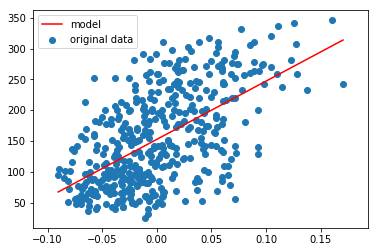

In [3]:
n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## How to show the iterative process

<IPython.core.display.Javascript object>


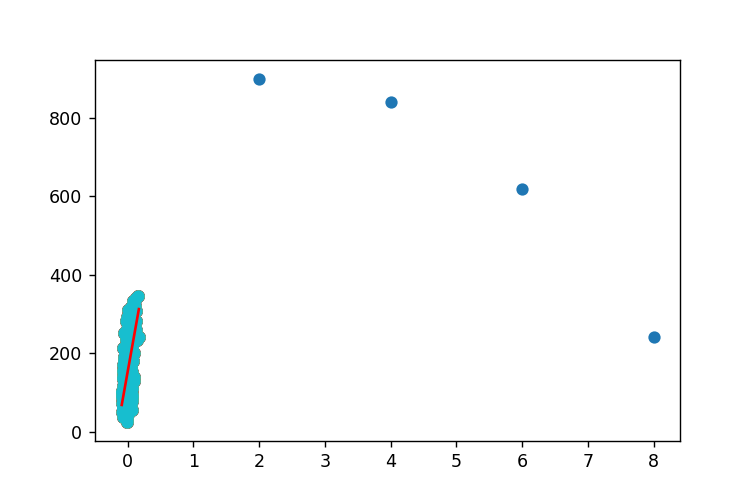

In [5]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation

n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

fig = plt.figure()
imgs = []

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    #print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
    if i % 50 == 0:
        x_min = np.min(X)
        x_max = np.max(X)
        y_min = a * x_min + b
        y_max = a * x_max + b

        img = plt.scatter(X, Y, label='original data')
        img = plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
        imgs.append(img)
        
ani = animation.ArtistAnimation(fig, imgs)
plt.show()

## How to use batch update method?

If some data is outliear, then only use one data can make the learning inaccuracy and slow.


* [梯度下降方法的几种形式](https://blog.csdn.net/u010402786/article/details/51188876)

## How to fit polynomial function?

If we observe a missle at some time, then how to estimate the trajectory? Acoording the physical theory, the trajectory can be formulated as:
$$
y = at^2 + bt + c
$$
The we need at least three data to compute the parameters $a, b, c$.

$$
L = \sum_{i=1}^N (y_i - at^2 - bt - c)^2
$$


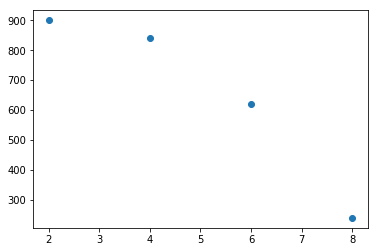

In [3]:
t = np.array([2, 4, 6, 8])
#t = np.linspace(0, 10)

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc


plt.scatter(t, y)
plt.show()

### How to get the update items?

$$
L = \sum_{i=1}^N (y_i - at^2 - bt - c)^2
$$

\begin{eqnarray}
\frac{\partial L}{\partial a} & = & - 2\sum_{i=1}^N (y_i - at^2 - bt -c) t^2 \\
\frac{\partial L}{\partial b} & = & - 2\sum_{i=1}^N (y_i - at^2 - bt -c) t \\
\frac{\partial L}{\partial c} & = & - 2\sum_{i=1}^N (y_i - at^2 - bt -c)
\end{eqnarray}

## How to use sklearn to solve linear problem?



a = 949.435260, b = 152.133484


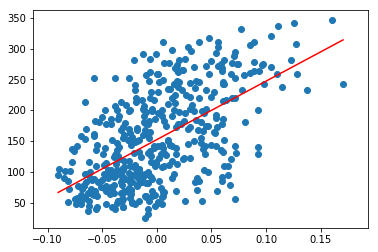

In [4]:
from sklearn import linear_model

# load data
d = datasets.load_diabetes()

X = d.data[:, np.newaxis, 2]
Y = d.target

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y)
plt.plot([x_min, x_max], [y_min, y_max], 'r')
plt.show()

## How to use sklearn to fit polynomial function?

In [6]:
# Fitting polynomial functions

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

t = np.array([2, 4, 6, 8])

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(t[:, np.newaxis], y)
model.named_steps['linear'].coef_


array([800.,  90., -20.])

## How to estimate some missing value by the model?


Y_est  =  [148.6844971  167.17376752 174.36403934 195.93485483 109.65159289
 120.95059148 245.23957594 204.15230835 269.89193649  75.75459712
 241.13084918 104.51568444 141.49422527 126.08649992 208.26103511
 233.94057735 151.76604217 158.956314   161.01067738 228.8046689
 220.58721538 129.16804499 100.40695768 117.86904641 168.2009492
 226.75030552 114.78750134 163.06504076 113.76031965 119.92340979
 157.92913231 237.02212242 120.95059148  98.3525943  123.00495485
 205.17949004  95.27104923 153.82040555 130.19522668  81.91768726
 171.28249427 137.38549851 137.38549851 189.77176469  82.94486895]
Y_test =  [198. 242. 232. 175.  93. 168. 275. 293. 281.  72. 140. 189. 181. 209.
 136. 261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111.
 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104.
 132. 220.  57.]
err = 8.437628 (56.601327), score = 0.422889
a = 953.024850, b = 152.544562


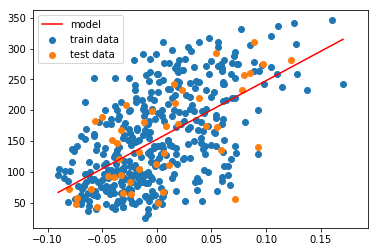

In [9]:
# load data
d = datasets.load_diabetes()

N = d.target.shape[0]
N_train = int(N*0.9)
N_test = N - N_train

X = d.data[:N_train, np.newaxis, 2]
Y = d.target[:N_train]

X_test = d.data[N_train:, np.newaxis, 2]
Y_test = d.target[N_train:]

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_est = regr.predict(X_test)
print("Y_est  = ", Y_est)
print("Y_test = ", Y_test)
err = (Y_est - Y_test)**2
err2 = sklearn.metrics.mean_squared_error(Y_test, Y_est)
score = regr.score(X_test, Y_test)
print("err = %f (%f), score = %f" % (np.sqrt(np.sum(err))/N_test, np.sqrt(err2), score))


# plot data
a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b


plt.scatter(X, Y, label='train data')
plt.scatter(X_test, Y_test, label='test data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()